# BASIC STATISTICS

## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

## Introduction
#### ●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


## Descriptive Analytics for Numerical Columns

### Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
### Steps:
###      -----> Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
###      -----> Identify numerical columns in the dataset.
###      -----> Calculate the mean, median, mode, and standard deviation for these columns.
###     -----> Provide a brief interpretation of these statistics.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [14]:
import numpy
print(numpy.__version__)

2.1.3


In [15]:
data_set=pd.read_csv('sales_data_with_discounts.csv')
##df = pd.DataFrame(data_set, columns=['Net Sales Value'])
##data_set.head()

In [78]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [16]:
data_set['Net Sales Value'].mean()

np.float64(30466.336131270138)

In [17]:
data_set['Net Sales Value'].median()

4677.788059301853

In [18]:
data_set['Net Sales Value'].mode()

0         326.974801
1         330.822058
2         466.350839
3         485.317265
4         496.607104
           ...      
445    162603.186379
446    163915.971000
447    163967.080070
448    166263.161348
449    179507.479049
Name: Net Sales Value, Length: 450, dtype: float64

In [19]:
data_set['Net Sales Value'].std()

46358.656624066934

In [20]:
data_set.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [21]:
data_set.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [22]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


## Data Visualization
### -----> Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
###   ●	Histograms:
###       Plot histograms for each numerical column.
###       Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

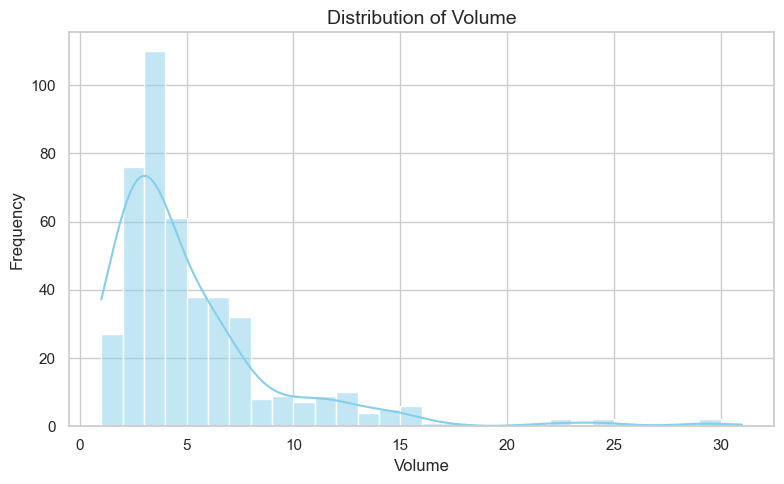

Skewness of Volume: 2.73
Outliers in Volume: 44 rows



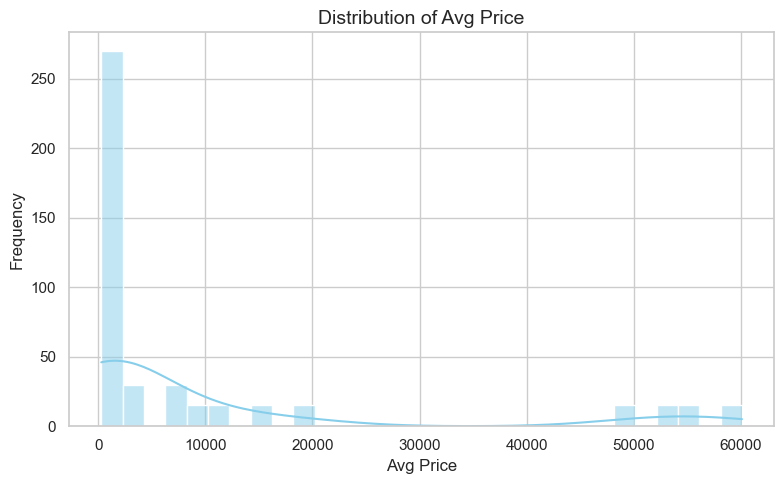

Skewness of Avg Price: 1.91
Outliers in Avg Price: 60 rows



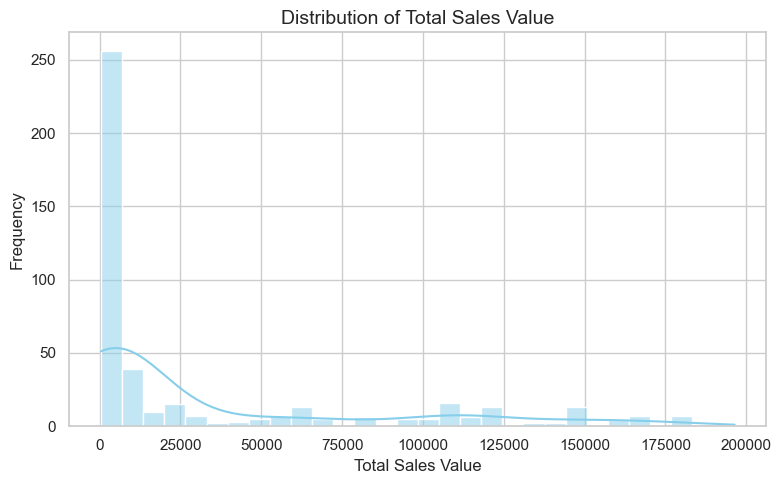

Skewness of Total Sales Value: 1.53
Outliers in Total Sales Value: 36 rows



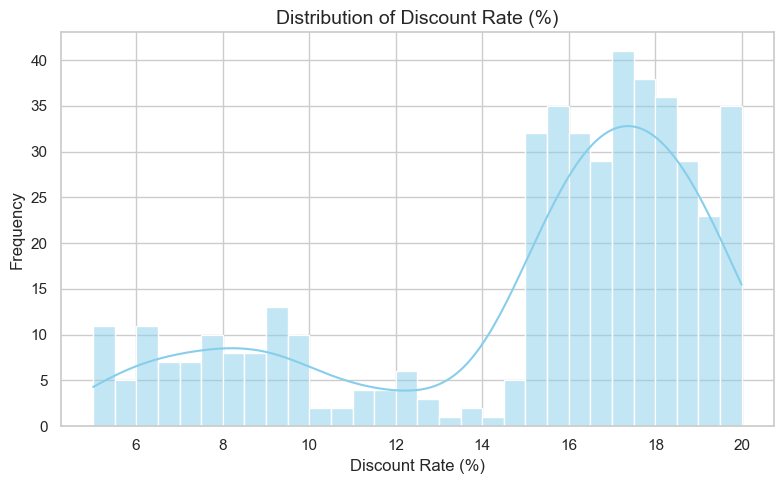

Skewness of Discount Rate (%): -1.06
Outliers in Discount Rate (%): 45 rows



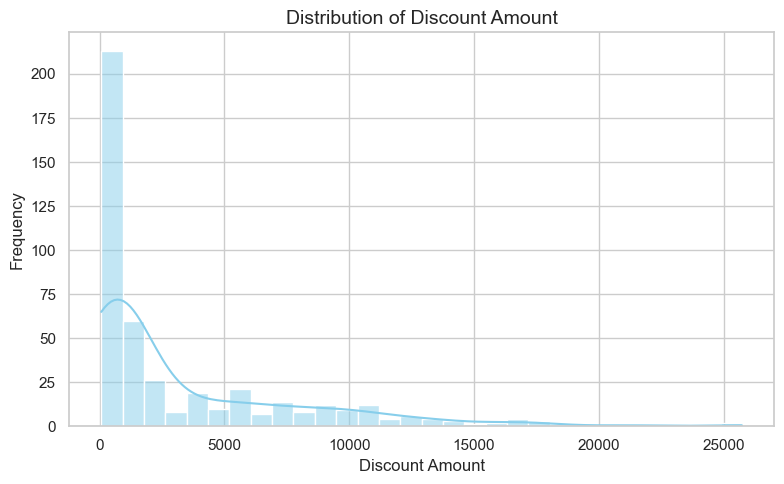

Skewness of Discount Amount: 1.91
Outliers in Discount Amount: 24 rows



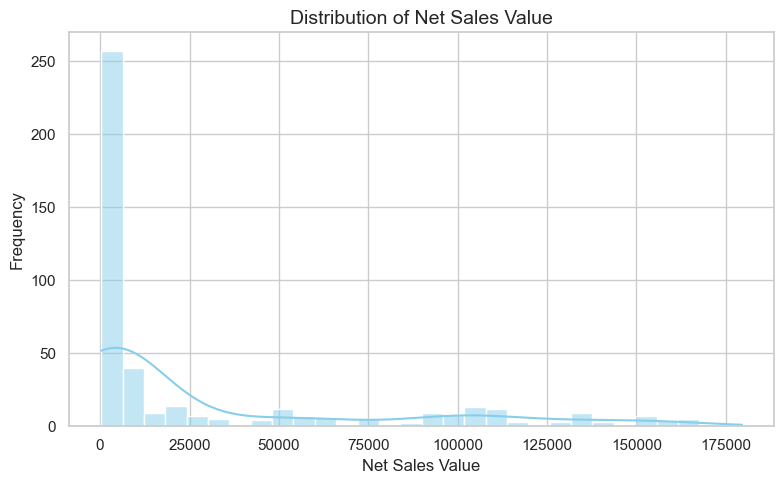

Skewness of Net Sales Value: 1.54
Outliers in Net Sales Value: 35 rows



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("sales_data_with_discounts.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Set plot style
sns.set(style="whitegrid")

# Plot histograms with KDE for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Skewness
    skew = df[col].skew()
    print(f"Skewness of {col}: {skew:.2f}")
    
    # Outlier detection using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}: {len(outliers)} rows\n")

###   ●	Boxplots:
###       Create boxplots for numerical variables to identify outliers and the interquartile range.
###       Discuss any findings, such as extreme values or unusual distributions.

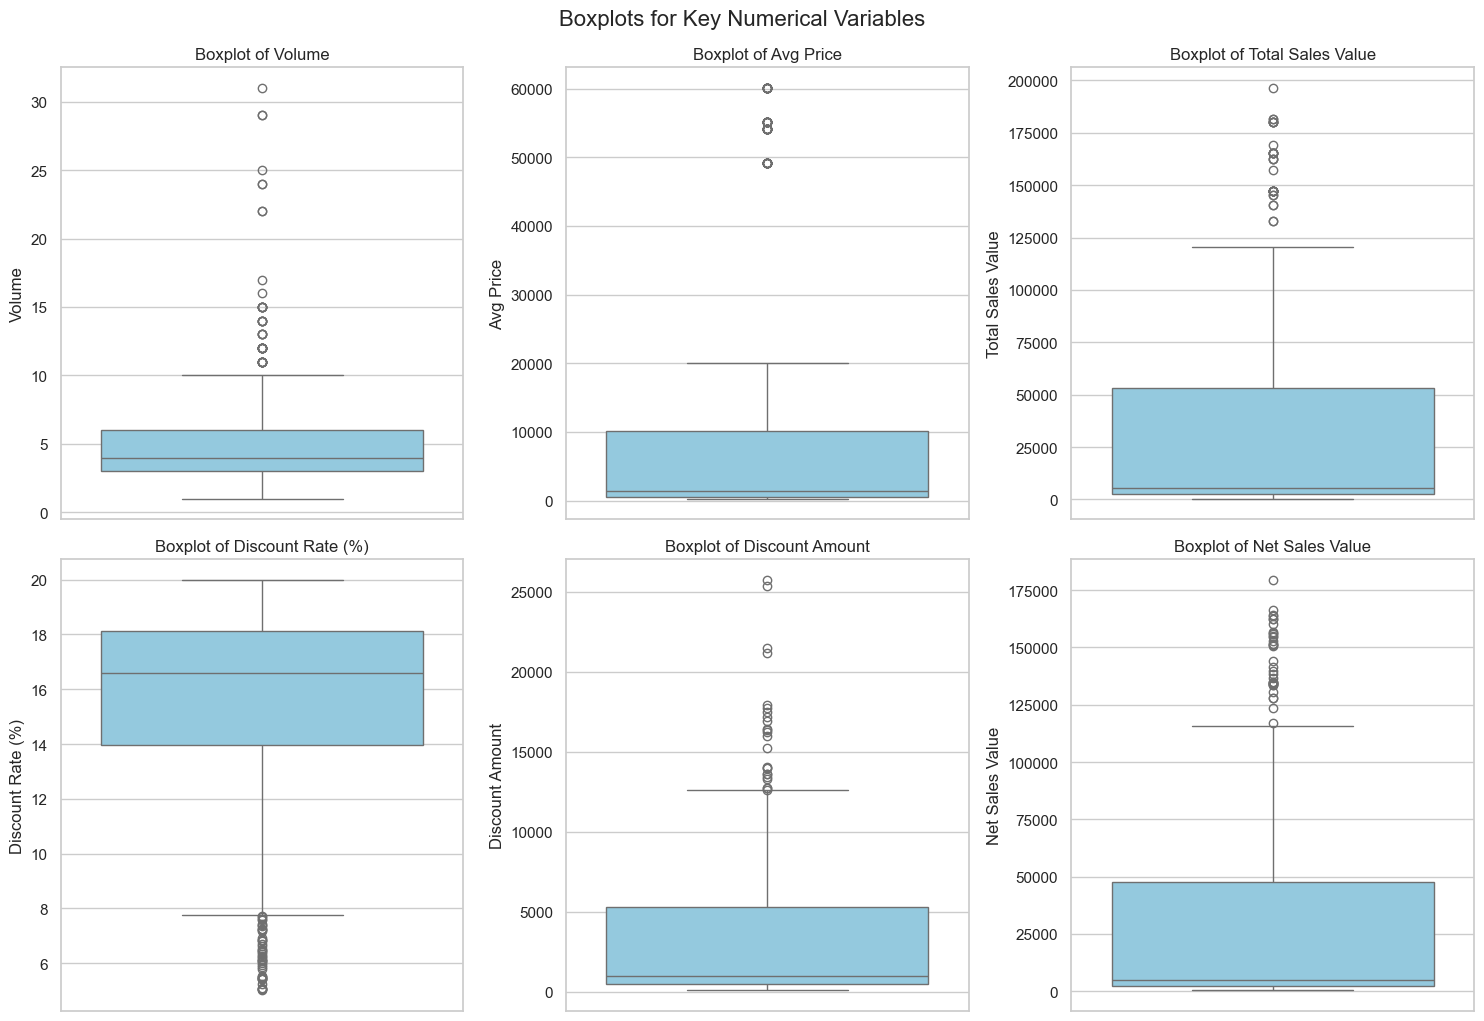


Volume
IQR: 3.00
Outlier Thresholds: < -1.50 or > 10.50
Number of Outliers: 44

Avg Price
IQR: 9635.00
Outlier Thresholds: < -13987.50 or > 24552.50
Number of Outliers: 60

Total Sales Value
IQR: 50500.00
Outlier Thresholds: < -73050.00 or > 128950.00
Number of Outliers: 36

Discount Rate (%)
IQR: 4.15
Outlier Thresholds: < 7.74 or > 24.34
Number of Outliers: 45

Discount Amount
IQR: 4856.04
Outlier Thresholds: < -6823.59 or > 12600.55
Number of Outliers: 24

Net Sales Value
IQR: 45645.70
Outlier Thresholds: < -66266.35 or > 116316.47
Number of Outliers: 35


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('sales_data_with_discounts.csv')

# Select numerical columns
num_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Set up the plot grid
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.suptitle('Boxplots for Key Numerical Variables', fontsize=16, y=1.02)
plt.show()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}")
    print(f"IQR: {IQR:.2f}")
    print(f"Outlier Thresholds: < {lower_bound:.2f} or > {upper_bound:.2f}")
    print(f"Number of Outliers: {len(outliers)}")

###   ●	Bar Chart Analysis for Categorical Column:
###     Identify categorical columns in the dataset.
###     Analyze the distribution of categories and provide insights.data_set.info()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


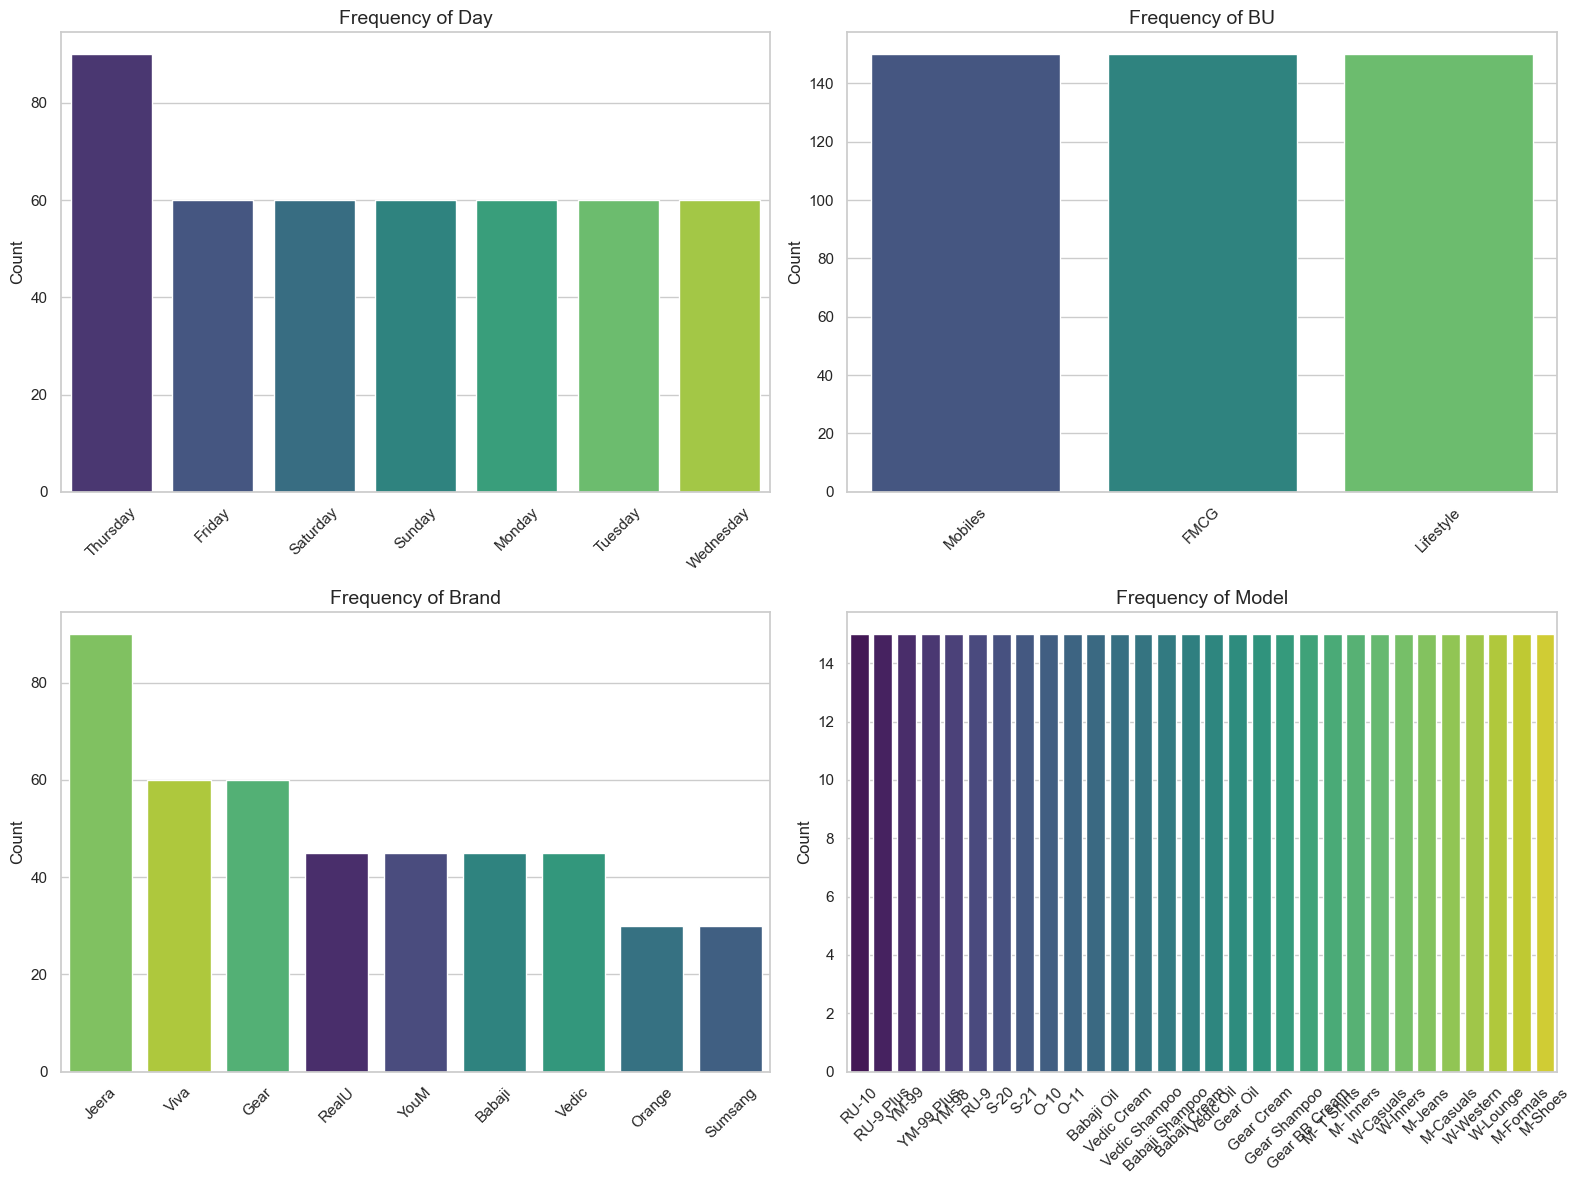

In [50]:
categorical_cols = ['Day', 'BU', 'Brand', 'Model']  # Customize as needed

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 12))

# Loop through each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    order = df[col].value_counts().index  # Sort bars by frequency
    sns.countplot(data=df, x=col, order=order, hue=col, palette='viridis')
    plt.title(f'Frequency of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Standardization of Numerical Variables
### ●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
### ●	Steps:
###          Explain the concept of standardization (z-score normalization).
### 	     Standardize the numerical columns using the formula: z=x-mu/sigma
### 	     Show before and after comparisons of the data distributions.


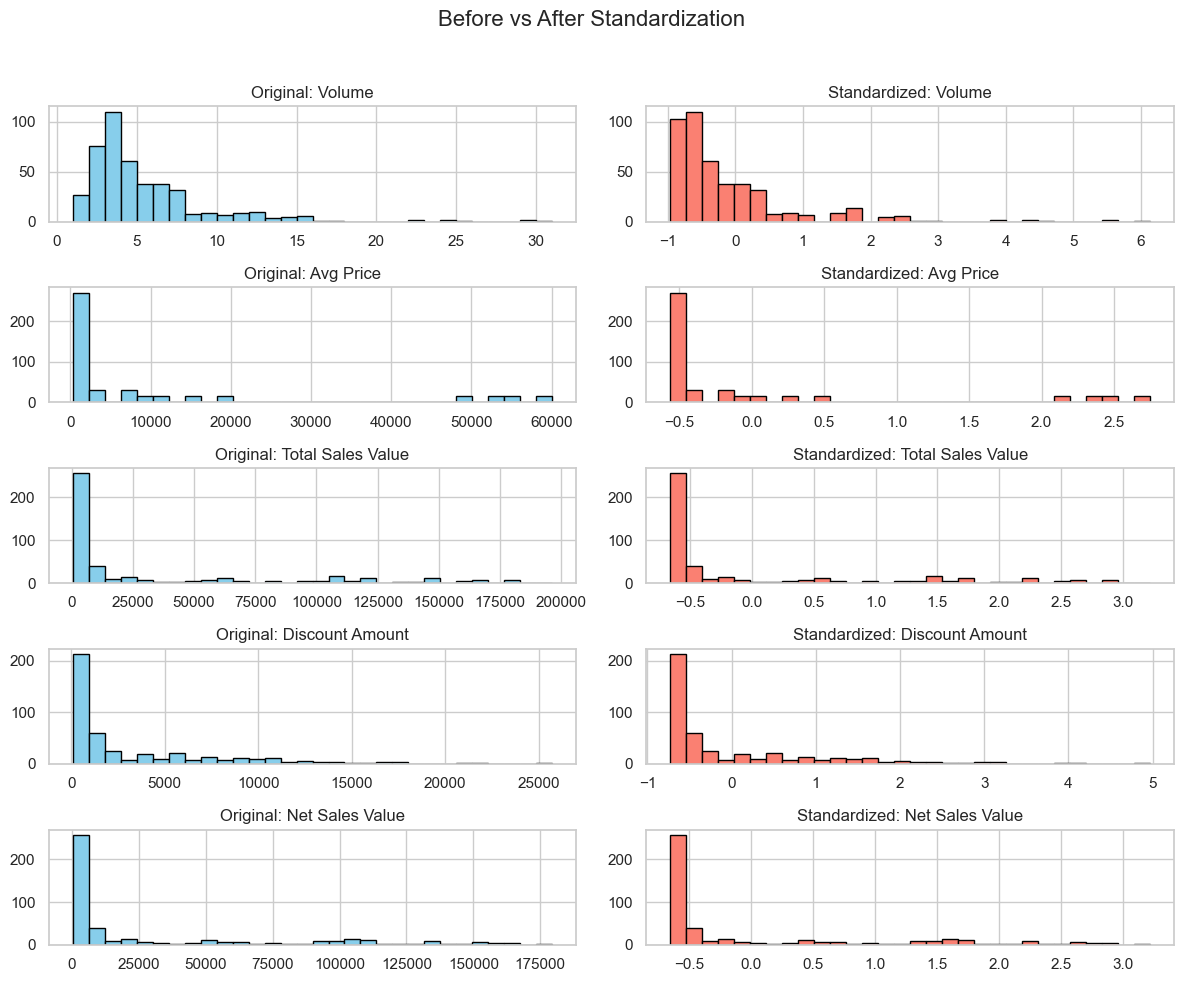

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sample: Load your dataset
df = pd.read_csv("sales_data_with_discounts.csv")

# Select numerical columns
num_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value']

# Plot original distributions
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 10))
fig.suptitle("Before vs After Standardization", fontsize=16)

for i, col in enumerate(num_cols):
    # Original distribution
    axes[i, 0].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f"Original: {col}")
    
# Standardize using z-score
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

for i, col in enumerate(num_cols):
    # Standardized distribution
    axes[i, 1].hist(df_standardized[col], bins=30, color='salmon', edgecolor='black')
    axes[i, 1].set_title(f"Standardized: {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Conversion of Categorical Data into Dummy Variables
###   ●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.
###   ●	Steps:
###          Discuss the need for converting categorical data into dummy variables (one-hot encoding).
### 	     Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
### 	     Display a portion of the transformed dataset.


In [54]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [55]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [56]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [58]:
df['BU'].value_counts()

BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64

## 1. OneHotEncoding using Pandas

In [59]:
df_encoded= pd.get_dummies(df,columns=['SKU','BU'])

bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [77]:
df_encoded

,Date,Day,City,Volume,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,...,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10,BU_Lifestyle,BU_Mobiles
0,01-04-2021,Thursday,C,15,RealU,RU-10,12100,181500,11.654820,21153.498820,...,0,0,0,0,0,0,0,0,0,1
1,01-04-2021,Thursday,C,10,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,...,0,0,0,0,0,0,0,0,0,1
2,01-04-2021,Thursday,C,7,YouM,YM-99,16100,112700,9.456886,10657.910157,...,1,0,0,0,0,0,0,0,0,1
3,01-04-2021,Thursday,C,6,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,...,0,1,0,0,0,0,0,0,0,1
4,01-04-2021,Thursday,C,3,YouM,YM-98,8100,24300,17.995663,4372.946230,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,C,2,Jeera,M-Casuals,1300,2600,15.475687,402.367873,...,0,0,0,0,0,0,0,0,1,0
446,15-04-2021,Thursday,C,6,Viva,W-Western,2600,15600,17.057027,2660.896242,...,0,0,0,0,0,0,0,0,1,0
447,15-04-2021,Thursday,C,2,Viva,W-Lounge,1600,3200,18.965550,606.897606,...,0,0,0,0,0,0,0,0,1,0
448,15-04-2021,Thursday,C,3,Jeera,M-Formals,1900,5700,16.793014,957.201826,...,0,0,0,0,0,0,0,0,1,0


## 2. K-1 OneHotEncoding

In [61]:
df_encoded= pd.get_dummies(df,columns=['SKU','BU'],drop_first=True)

# # Convert only boolean columns to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [62]:
df_encoded

,Date,Day,City,Volume,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,...,SKU_M03,SKU_M04,SKU_M05,SKU_M06,SKU_M07,SKU_M08,SKU_M09,SKU_M10,BU_Lifestyle,BU_Mobiles
0,01-04-2021,Thursday,C,15,RealU,RU-10,12100,181500,11.654820,21153.498820,...,0,0,0,0,0,0,0,0,0,1
1,01-04-2021,Thursday,C,10,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,...,0,0,0,0,0,0,0,0,0,1
2,01-04-2021,Thursday,C,7,YouM,YM-99,16100,112700,9.456886,10657.910157,...,1,0,0,0,0,0,0,0,0,1
3,01-04-2021,Thursday,C,6,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,...,0,1,0,0,0,0,0,0,0,1
4,01-04-2021,Thursday,C,3,YouM,YM-98,8100,24300,17.995663,4372.946230,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,C,2,Jeera,M-Casuals,1300,2600,15.475687,402.367873,...,0,0,0,0,0,0,0,0,1,0
446,15-04-2021,Thursday,C,6,Viva,W-Western,2600,15600,17.057027,2660.896242,...,0,0,0,0,0,0,0,0,1,0
447,15-04-2021,Thursday,C,2,Viva,W-Lounge,1600,3200,18.965550,606.897606,...,0,0,0,0,0,0,0,0,1,0
448,15-04-2021,Thursday,C,3,Jeera,M-Formals,1900,5700,16.793014,957.201826,...,0,0,0,0,0,0,0,0,1,0


## 3. OneHotEncoding using Sklearn

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:12],df.iloc[:,-1],test_size=0.2,random_state=2)

In [64]:
#df.head()

In [65]:
X_train.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount
276,10-04-2021,Saturday,M07,C,2,Mobiles,Sumsang,S-20,49100,98200,7.802861,7662.409395
114,04-04-2021,Sunday,L05,C,7,Lifestyle,Jeera,M-Jeans,2099,14693,17.788713,2613.695664
345,12-04-2021,Monday,F06,C,3,FMCG,Vedic,Vedic Oil,450,1350,15.624859,210.935591
223,08-04-2021,Thursday,F04,C,2,FMCG,Babaji,Babaji Shampoo,465,930,19.910384,185.166569
337,12-04-2021,Monday,M08,C,1,Mobiles,Sumsang,S-21,54100,54100,9.791440,5297.169083


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [68]:
X_train_new = ohe.fit_transform(X_train[['BU','Brand','Model']])

In [69]:
X_test_new = ohe.transform(X_test[['BU','Brand','Model']])

In [70]:
X_train_new.shape

(360, 39)

In [71]:
np.hstack((X_train[['SKU','City']].values,X_train_new))

array([['M07', 'C', 0, ..., 0, 0, 0],
       ['L05', 'C', 1, ..., 0, 0, 0],
       ['F06', 'C', 0, ..., 0, 0, 0],
       ...,
       ['F03', 'C', 0, ..., 0, 0, 0],
       ['F06', 'C', 0, ..., 0, 0, 0],
       ['F09', 'C', 0, ..., 0, 0, 0]], dtype=object)

## 4. OneHotEncoding with Top Categories

In [72]:
counts = df['Brand'].value_counts()

In [73]:
counts

Brand
Jeera      90
Viva       60
Gear       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Orange     30
Sumsang    30
Name: count, dtype: int64

In [74]:
df['Brand'].nunique()
threshold = 50

In [75]:
repl = counts[counts <= threshold].index

In [79]:
pd.get_dummies(df['Brand'].replace(repl, 'uncommon')).sample(5)

,Gear,Jeera,Viva,uncommon
63,False,False,False,True
149,False,True,False,False
351,False,True,False,False
220,False,False,False,True
124,False,False,False,True
